### 1. Write a Python program to display a pie chart for the top 10 most popular programming languages with the most popular wedge and the least popular wedge exploded.

In [25]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [26]:
#reading data from csv file
prog_lang=pd.read_csv("Programming_Language_Popularity.csv")

In [27]:
#printing dataframe
prog_lang

,Language,Popularity Index
0,Java,16.38
1,C/C++,5.56
2,Python,31.02
3,Perl,0.48
4,TypeScript,1.90
5,Groovy,0.45
6,Matlab,1.67
7,Go,1.43
8,Lua,0.52
9,Ruby,1.17


In [28]:
#sorting based on popularity index
prog_lang.sort_values(by="Popularity Index", ascending=False, inplace=True)

In [29]:
prog_lang

,Language,Popularity Index
2,Python,31.02
0,Java,16.38
16,Javascript,8.41
11,C#,6.52
24,PHP,5.83
1,C/C++,5.56
21,R,4.26
18,Objective-C,3.48
15,Swift,2.37
4,TypeScript,1.90


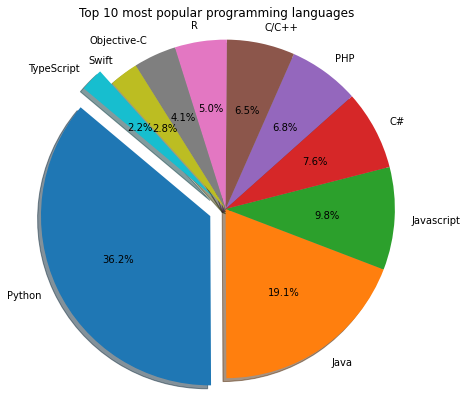

In [30]:
#giving which parts to explode
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1) 

# Plotting pie chart for top 10 popular languages
fig, ax = plt.subplots(figsize=[7,7])
ax.set_title("Top 10 most popular programming languages")
pie = ax.pie(prog_lang['Popularity Index'].head(10), explode=explode, labels=prog_lang['Language'].head(10), autopct='%1.1f%%',
shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.close(fig)

### Observation:
    Among top 10 most popular programming languages ,python is the most popular and type script is the less popular and exploded
    them.

### 2. Write a Python program to display a bar chart of the popularity of programming Languages sorted in the order of highest to lowest popularity. Use different color for each bar. Attach a text label above each bar displaying its popularity (float value). 


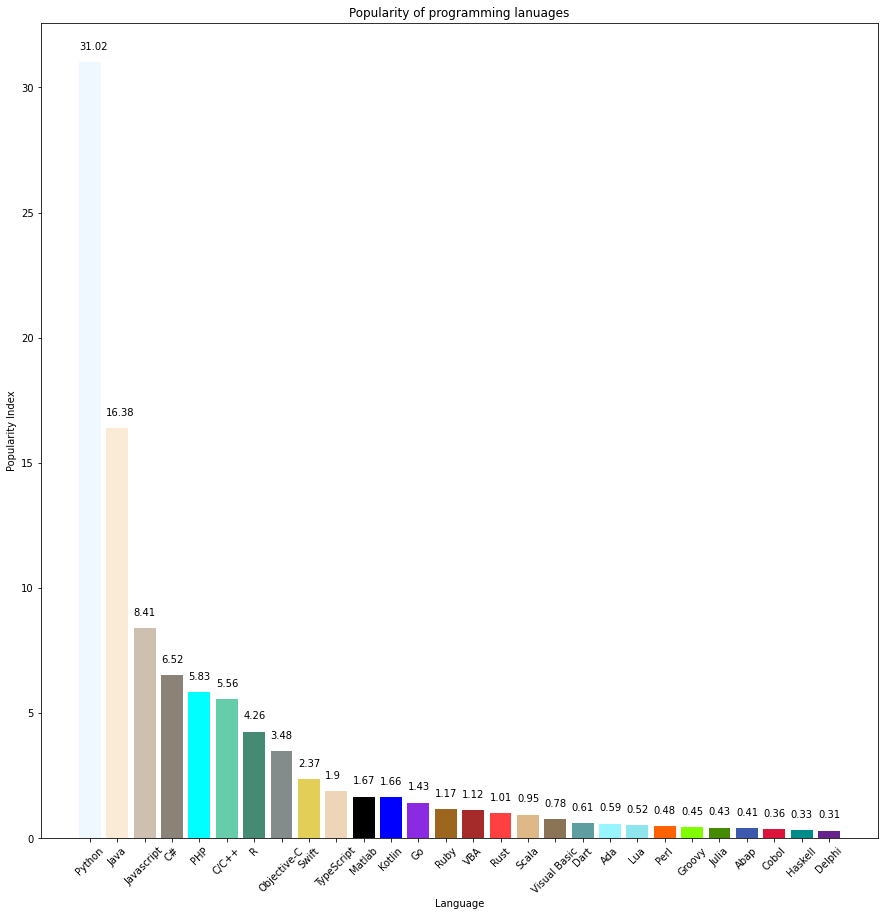

In [31]:
#giving fig size
fig, ax = plt.subplots(figsize=[15,15])
#giving colors
color = ['#F0F8FF','#FAEBD7','#CDC0B0','#8B8378','#00FFFF','#66CDAA','#458B74','#838B8B','#E3CF57','#EED5B7','#000000','#0000FF',
         '#8A2BE2','#9C661F','#A52A2A','#FF4040','#DEB887','#8B7355','#5F9EA0','#98F5FF','#8EE5EE','#FF6103','#7FFF00','#458B00',
         '#3D59AB','#DC143C','#008B8B','#68228B']
#plotting bar chart
bars = ax.bar('Language','Popularity Index',data =prog_lang,color = color)
#giving title
ax.set_title("Popularity of programming lanuages")
#giving label names
plt.xlabel('Language')
plt.ylabel('Popularity Index')
#giving annotations
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x(),y+0.5,y)
plt.xticks(rotation = 45)
plt.show()
plt.close(fig)

### Observation:
    Sorted from highest to lowest popularity based on popularity index. python is the most popular and delphi is the least popular.

### 3. Use dataset "Corona_Tweets.csv" for this question. Write a Python program to display word cloud for the Corona_Tweets dataset. Print the most popular (frequent) word. 

In [24]:
#importing wordcloud and stopwords
from wordcloud import WordCloud, STOPWORDS 
#reading data from csv file
corona=pd.read_csv("Corona_Tweets.csv")
corona

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


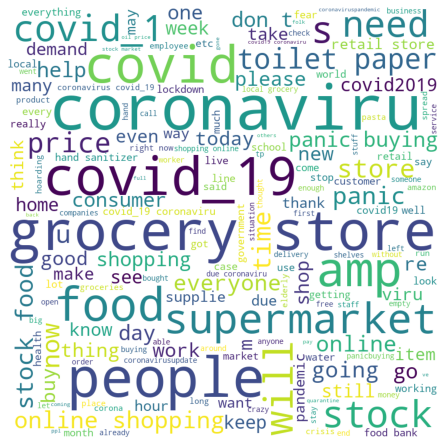

In [86]:
 
comment_words = ''
 #storing the stopwords
stopwords = set(STOPWORDS)
  
# iterate through the original tweets 
for val in corona.OriginalTweet: 
      
# typecaste each val to string 
    val = str(val) 
#finding the urls
    idx=val.find("http")
    val=val[:idx]
  
#spliting the value 
    tokens = val.split() 
      
#Converting each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    without_stopWords = []
#removing stopwords
    for token in tokens:
        if token not in stopwords:
            without_stopWords.append(token)
    comment_words += " ".join(without_stopWords)+" "
#defining wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.close()

In [87]:
val

'I and @ForestandPaper members are committed to the safety of our employees and our end-users. We are monitoring COVID-19. Rest assured that tissue manufacturers are continuing to produce and ship products.  '

In [88]:
#removing punctuations and special characters
import re
comment_words = re.sub('[^a-z]+', ' ', comment_words)
comment_words

'trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold out online grocers foodkick maxdelivery coronavirus fearing shoppers stock find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices find protect loved ones coronavirus panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker s becomes bigapple st confirmed coronavirus patient bloomberg staged event toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angeles prices pump going down look coronavirus impacting prices pm abc voting age coronavirus hand sanitizer supertuesday drtedros we can t stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros

In [89]:
#splitting the comnment words
words=comment_words.split()
words

['trending',
 'new',
 'yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 'pictured',
 'wegmans',
 'brooklyn',
 'sold',
 'out',
 'online',
 'grocers',
 'foodkick',
 'maxdelivery',
 'coronavirus',
 'fearing',
 'shoppers',
 'stock',
 'find',
 'hand',
 'sanitizer',
 'fred',
 'meyer',
 'turned',
 'amazon',
 'pack',
 'purell',
 'check',
 'coronavirus',
 'concerns',
 'driving',
 'prices',
 'find',
 'protect',
 'loved',
 'ones',
 'coronavirus',
 'panic',
 'buying',
 'hits',
 'newyork',
 'city',
 'anxious',
 'shoppers',
 'stock',
 'food',
 'amp',
 'medical',
 'supplies',
 'healthcare',
 'worker',
 's',
 'becomes',
 'bigapple',
 'st',
 'confirmed',
 'coronavirus',
 'patient',
 'bloomberg',
 'staged',
 'event',
 'toiletpaper',
 'dunnypaper',
 'coronavirus',
 'coronavirusaustralia',
 'coronavirusupdate',
 'covid',
 'news',
 'corvid',
 'newsmelb',
 'dunnypapergate',
 'costco',
 'one',
 'week',
 'everyone',
 'buying',
 'baby',
 'milk',
 'powder',
 'next',
 'everyone',
 'buying',
 'toile

In [90]:
#printing the most frequent word using a function
def most_freq(list):
    return max(set(list), key = list.count)
print(most_freq(words))

covid


### Justification and observation:
    Removed punctuations,special characters,urls and stopwords to print the most frequent word and the most frequent word i got after removal of stopwords is covid.

### 4. Write a Python program to display the number of units sold per month for each product using multiline plots (i.e., separate line plot of different color for each product on a single figure). Add circle markers. Make use of legend to indicate which line plot is for which product. 


In [28]:
#reading data from csv file
company=pd.read_csv("Company_Sales_Data.csv")
company

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


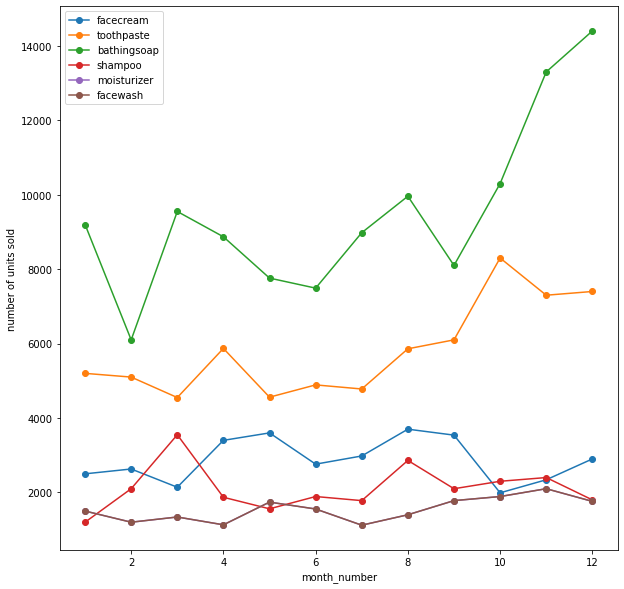

In [84]:
#giving figure size
plt.figure(figsize=(10,10))
#storing the required columns in a list
items_list=['facecream','toothpaste','bathingsoap','shampoo','moisturizer','facewash']
#plotting line plots for each column required
for item in items_list:
    plt.plot(company['month_number'], company[item], label=item, marker='o')
    
plt.legend()
#giving label names
plt.xlabel('month_number')
plt.ylabel('number of units sold')
plt.show()

### Observations:
          Blue line-Face cream, Orange line-Tooth paste, Green line-Bathing soap, Red line-Shampoo, Violet line-Moisturizer, Brown line-Face wash.
          The line plot for facewash and moisturizer are merging as there are same number of units sold in each month.

### 5. Write a Python program to display scatterplot for the number of units sold per month for the products facecream, facewash and shampoo on a single figure. Use different markers and colors for each product. Make use of legend to indicate which marker is for which product.

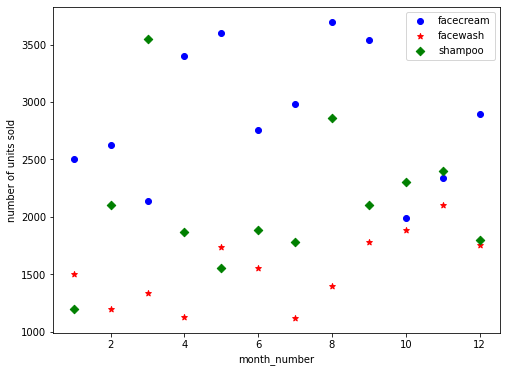

In [83]:
#taking colors
colors = ['blue', 'red', 'green']
#taking markers
markers = ['o','*','D']
#storing required columns in a list
list=['facecream','facewash','shampoo']
#giving fig size
fig = plt.figure(figsize = (8,6))
#plotting scatter plots for 3 columns
for i in range(len(colors)):
    px = company["month_number"]
    py = company[list[i]]
    plt.scatter(px, py, c=colors[i],marker = markers[i])
#giving legend to indicate the colour and shape of each column
plt.legend(list)
#giving label names
plt.xlabel('month_number')
plt.ylabel('number of units sold')
plt.show()
plt.close(fig)

### Observation and justification:
   Took Blue rounds for Face cream, Red stars for Facewash, Green diamonds for Shampoo.